<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm_notebook
import re
from sklearn.model_selection import train_test_split

In [ ]:
results = [] # Unindent if wanting to do multiple pages
for x in tqdm_notebook(range(1,11)):  #Uncomment if wanting to do multiple pages
    url = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start={}".format(x)
    r=requests.get(url)
    soup=BeautifulSoup(r.text, 'html.parser')
    for job in soup.find_all('div',attrs={'class':'jobsearch-SerpJobCard'}):
        try:
            results.append(job)
        except:
            results.append(np.nan)
            

In [ ]:
len(results)

In [ ]:
print(results)

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [ ]:
## YOUR CODE HERE
def extract_job_title(results):
    job_title = []
    for job in results:
        try:
            job_title.append(job.find('div',attrs={'class':'title'}).text.strip())
        except:
            job_title.append(np.nan)
    return job_title

In [ ]:
def extract_company(results):
    company = []
    for job in results:
        try:
            company.append(job.find('a',attrs={'data-tn-element':'companyName'}).text.strip())
        except:
            company.append(np.nan)
    return company

In [ ]:
def extract_location(results):
    location = []
    for job in results:
        location.append(city)
    return location

In [ ]:
#Apparently we dont really need this
def extract_description(results):
    description = []
    for job in results:
        try:
            description.append(job.find('div',attrs={'class':'summary'}).text.strip())
        except:
            description.append(np.nan)
    return description

In [ ]:
def extract_salary(results):
    salary = []
    for job in results:
        try:
            salary.append(job.find('span',attrs={'class':'salaryText'}).text.strip())
        except:
            salary.append(np.nan)
    return salary

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [ ]:
pattern = re.compile(r'(\d+\,\d+|\d+)')


In [ ]:
x=soup.find('div',attrs={'id':'searchCountPages'}).text.strip()
print(x)
re.findall(pattern,x)

In [ ]:
re.findall(pattern,x)[1]

In [ ]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
# Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []
location=[]

for city in ['New+York',
             'Los+Angeles' , 'Chicago', 'Houston', 'Phoenix',
             'Philadelphia', 'San+Antonio', 'San+Diego', 'Dallas', 'San+Jose',
             'Austin' , 'Jacksonville', 'Fort+Worth', 'Columbus', 'San+Francisco',
             'Charlotte', 'Indianapolis', 'Seattle', 'Denver', 'Washington',
             'Boston', 'El+Paso', 'Detroit', 'Nashville', 'Portland',
             ]:    
    
    for job_title in ['"Data+Scientist"',
                      '"Data+Engineer"','"Data+Analyst"',
                      'Data+Scientist+Graduate', '"Data+Science"'
                      ]:
        try:
            url = "http://www.indeed.com/jobs?q={}+%2420%2C000&l={}&start=1".format(job_title,city)
            r=requests.get(url)
            soup=BeautifulSoup(r.text, 'html.parser')  



            pattern = re.compile(r'(\d+\,\d+|\d+)')
            x=soup.find('div',attrs={'id':'searchCountPages'}).text.strip()
            max_results_per_city=int(re.findall(pattern,x)[1].replace(',',''))
            for start in tqdm_notebook(range(0, max_results_per_city,50)):
                # Grab the results from the request (as above)
                # Append to the full set of results
                url = "http://www.indeed.com/jobs?q={}+%2420%2C000&l={}&start={}&limit=50".format(job_title,city,start)
                r=requests.get(url)
                soup=BeautifulSoup(r.text, 'html.parser')
                for job in soup.find_all('div',attrs={'class':'jobsearch-SerpJobCard'}):
                    try:
                        results.append(job)
                        location.append(city)
                    except:
                        results.append(np.nan)
                        location.append(city)
                pass
        except:
            pass

In [ ]:
len(results)

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [ ]:
## YOUR CODE HERE
location = [x.replace('+',' ') for x in location]
results_dict={'job_title':extract_job_title(results),
              'company':extract_company(results),
              'location':location,
              'salary':extract_salary(results),
              }

df=pd.DataFrame(results_dict,columns=results_dict.keys())
df.to_csv('./df1.csv') #Saves dataframe as a CSV file
#df1 = The first 25 largest cities

In [ ]:
df

In [ ]:
df1= pd.read_csv('./df1.csv')
del df1['Unnamed: 0']

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [ ]:
### YOUR CODE HERE
#Cleaning with no nulls and shows yearly salary
df1=df1[(df1['salary'].notnull()) & (df1['salary'].str.contains('year'))]
df1.drop_duplicates(keep='first',inplace=True)


#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [ ]:
## YOUR CODE HERE
#Converting salary into an average for ranges & a float
def get_salary(x):
    x=x.replace(',','').replace('$','').split(' ')
    salary=[]
    for i in x:
        if i.isnumeric():
            if len(salary)<2:
                salary.append(int(i))
    return np.mean(salary)
            

In [ ]:
df1['salary']=df1['salary'].map(lambda x: get_salary(x))

### Save your results as a CSV

In [ ]:
## YOUR CODE HERE
df1.to_csv('./cleandf.csv')

# START FROM HERE

### Load in the the data of scraped salaries

In [5]:
## YOUR CODE HERE
clean = pd.read_csv('./cleandf.csv')

In [8]:
clean.drop('Unnamed: 0',inplace=True,axis=1)

In [9]:
clean

,job_title,company,location,salary
0,Data Scientist,Research Foundation of The City University of ...,New York,85000.0
1,Data Scientist,New York City DEPARTMENT OF TRANSPORTATION,New York,73873.5
2,Data Scientist,New York City DEPARTMENT OF INVESTIGATION,New York,60172.0
3,Special Assistant (working title: Research Dat...,NaN,New York,64000.0
4,Senior Data Scientist,MetroPlus Health Plan,New York,107500.0
...,...,...,...,...
526,"Hydrologist, GS-1315-11/12 (DEU-MTL)",US Department of the Interior,Portland,87375.5
527,Research Assistant 2,Oregon Health & Science University,Portland,40284.0
528,CD2H Evaluator (Research Associate),Oregon Health & Science University,Portland,53000.0
529,Research Analytics and Big Data Manager,Oregon Health & Science University,Portland,118343.0


### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [10]:
import matplotlib.pyplot as plt

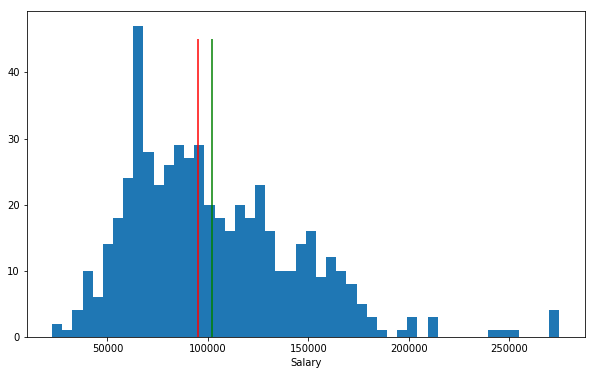

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(clean.salary, bins=50)
plt.vlines(clean.salary.median(), 0, 45, color='r')
plt.vlines(clean.salary.mean(), 0, 45, color='g')
plt.xlabel('Salary');

In [12]:
clean['salary'].median()

95000.0

In [13]:
## YOUR CODE HERE
#1 is HIGH , 0 is LOW
clean['hilo']=[1 if x>= clean['salary'].median() else 0 for x in clean['salary']]

In [14]:
clean.shape

(531, 5)

#### Thought experiment: What is the baseline accuracy for this model?

In [15]:
## YOUR CODE HERE
clean['hilo'].value_counts(normalize=True)


1    0.500942
0    0.499058
Name: hilo, dtype: float64

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

## Dummifying & creating a Train,Test Split

In [16]:
## YOUR CODE HERE
df=pd.get_dummies(clean,drop_first=True)

In [17]:
df.head()

,salary,hilo,"job_title_AVP, Big Data Engineer","job_title_AVP, Senior Data Engineer","job_title_AVP, Technical Data Engineer Lead","job_title_Adjunct Professors in Business Analytics, FinTech, AI, DevOp...",job_title_Analysis and Reporting Analyst,job_title_Analyst - Assessment & Research G05-G07,"job_title_Analyst I/II, Data Science",job_title_Analyst I/II- Department of Finance (Debt Management),...,location_New York,location_Philadelphia,location_Phoenix,location_Portland,location_San Antonio,location_San Diego,location_San Francisco,location_San Jose,location_Seattle,location_Washington
0,85000.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,73873.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,60172.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,64000.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,107500.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [19]:
X=df.T[df.columns.str.contains('location')==True].T
X=X.applymap(lambda x: int(x))
y=df['hilo']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


## Logistic Regression

In [20]:
lr = LogisticRegression()

gs_params={'penalty': ['l2'],
          'solver':['lbfgs'],
          'C':np.logspace(-3,3,10),
          'max_iter':[100,250,500]}

lr_GridSearchCV = GridSearchCV(lr,param_grid=gs_params,n_jobs=2,cv=5,verbose=0)

lr_GridSearchCV.fit(X_train,y_train)

/Users/Huski/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'max_iter': [100, 250, 500], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             

In [21]:
print('Best Parameters:',lr_GridSearchCV.best_params_)
print('Best Score:',lr_GridSearchCV.best_score_)
print('Best Training Score:',lr_GridSearchCV.score(X_train,y_train))
print('Best Test Score:', lr_GridSearchCV.score(X_test,y_test))

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.6580188679245284
Best Training Score: 0.6721698113207547
Best Test Score: 0.6355140186915887


In [22]:
lr= LogisticRegression(penalty='l2',solver='lbfgs',C=10**10,max_iter=100)

lr.fit(X_train,y_train)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lr_coef = pd.DataFrame(lr.coef_,columns=X_train.columns).T
lr_coef.columns = ['coefficient']
lr_coef = lr_coef.sort_values(by='coefficient',axis=0,ascending=False)

In [24]:
#Coefficients represents the correlation between a high or low correlation and the cities .
#I.e. Philadelphia, San Fran, San Jose seems to have high average salaries for any of the data roles
#     Whereas El Paso, Phoenix and Columbus seem to have low average salaries.
# 'High' or 'Low' is defined by over or below the median salary.
# NOTE: Reason for El paso being incredibly low is probably due to the fact that there was only 1 Datapoint.
#       Phoenix and Columbus seems like they have a few.
lr_coef.head()

,coefficient
location_Philadelphia,1.859921
location_San Francisco,1.637070
location_San Jose,1.636770
location_Los Angeles,0.988340
location_Chicago,0.892592


In [25]:
#Just having a look at the bottom 3 corrs, to check if there are any absurdities.
clean[(clean['location']=='El Paso') | (clean['location']=='Phoenix') | (clean['location']=='Columbus') ]

,job_title,company,location,salary,hilo
178,Statistician,US Department of Health And Human Services,Phoenix,84819.5,0
179,Data Architect,Arizona State University,Phoenix,150000.0,1
180,HRIS Data Analyst Senior,Maricopa Community Colleges,Phoenix,88847.0,0
181,Data Engineer / Java,Jobspring,Phoenix,100000.0,1
182,Business Data Analyst,"Maricopa County, AZ",Phoenix,63783.0,0
183,Healthcare Data Analyst,State of Arizona,Phoenix,60000.0,0
184,Management and Program Analyst,US Department of the Interior,Phoenix,58028.0,0
185,Planning and Research Analyst,Maricopa Community Colleges,Phoenix,59960.0,0
186,SENIOR BUSINESS ANALYST,State of Arizona,Phoenix,70720.0,0
187,Business Data Analyst,CRS Temporary Housing,Phoenix,50000.0,0


## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [27]:
dt= DecisionTreeClassifier()
dtc_params={
            'max_depth': [None]+ list(range(1,25)),
            'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50],           
}
dtc_gs = GridSearchCV(dt,dtc_params,cv=5,n_jobs=2,verbose=0)

In [28]:
dtc_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=2,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15, 16, 

In [29]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 7, 'min_samples_split': 2}
0.6556603773584906


In [30]:
feature_importances = pd.DataFrame({'feature':X_train.columns,
                                    'importance': dtc_best.feature_importances_})
feature_importances.sort_values('importance',ascending=True,inplace=True)

In [31]:
feature_importances

,feature,importance
20,location_Washington,0.000000
14,location_Portland,0.000000
11,location_New York,0.000000
19,location_Seattle,0.000000
9,location_Indianapolis,0.000000
15,location_San Antonio,0.000000
7,location_Fort Worth,0.000000
8,location_Houston,0.000000
5,location_Denver,0.000000
4,location_Dallas,0.000000


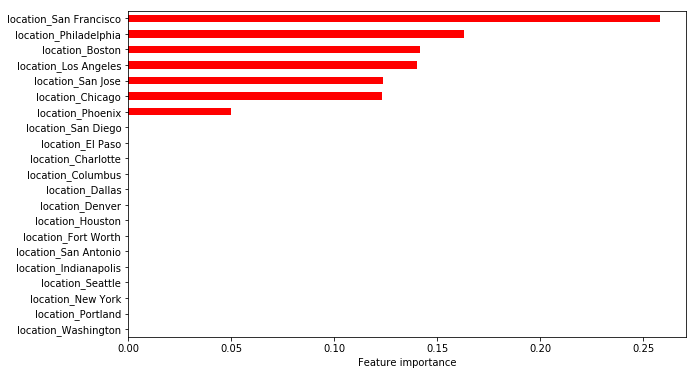

In [32]:
fig ,ax=plt.subplots(figsize=(10,6))
feature_importances.importance.plot(kind='barh',colormap='hsv',alpha=1)
ax.set_xlabel('Feature importance')
ax.set_yticklabels(feature_importances['feature'])
plt.show()

from this graph above, it seems that San Francisco seems to be quite of high importance at 0.258. This suggests that the decision tree classified certain jobs based off whether it was based in SF or not the most frequently.

# Using NLP on job title, and dummifying other variables

We will the clean the titles abit more so that titles that may include things such as 'scientist' is the same as 'science' or 'analytics' is the same as 'analysis'

In [33]:
clean['job_title'].unique()

array(['Data Scientist',
       'Special Assistant (working title: Research Data Officer 1 –...',
       'Senior Data Scientist',
       'Data Scientist, Office of Talent Research and Data (ORD)',
       'Cyber Data Engineer',
       'Senior Data Analyst M/WBE, Enterprise Data Services',
       'Supervisory Survey Statistician (Regional Survey Manager), G...',
       'Senior Counsel for Telecommunications/Artificial Intelligenc...',
       'Data Scientist - Work with Analytics and Engineering',
       'Power BI Developer / Lake Success / Long Island',
       'Data Engineer - Working on Data Science Team',
       'Senior Data Engineer / AI Software',
       'Data Science Instructor, Principal Data Scientist',
       'VP Data Science', 'Senior Datashare Data Engineer',
       'Data Engineer / NYC', 'Junior Data Engineer- Mission Driven',
       'Data Engineer / Python', 'Senior Data Engineer', 'Data Engineer',
       'Deputy Director of Analytics (Data Product & Research)',
       'Mid L

In [34]:
def replace_words(role):
    role=role.lower()
    role=role.replace('scientist','science')
    role=role.replace('analysis','analyst')
    role=role.replace('analytics','analyst')
    role=role.replace('engineering','engineer')
    role=role.replace('sr.','senior')
    role=role.replace('sr','senior')
    role=role.replace('jr.','junior')
    role=role.replace('jr','junior')
    role=role.replace('mid-level','mid level')
    role=role.replace('.',' ')
    role=role.replace('/',' ')
    return role

clean['job_title']=clean['job_title'].apply(lambda x: replace_words(x))


In [35]:
df=clean.copy()

In [36]:
#Puts all the words in every row into 1 string
words=' '
for title in df['job_title']:
    words=words+' '+title

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cvec= CountVectorizer(stop_words='english', ngram_range=(2,3),max_features=100)
cvec.fit([words])

document_matrix = cvec.transform([words])
df_words = pd.DataFrame(cvec.transform([words]).toarray(),
                        columns=cvec.get_feature_names(),
                        index=['count'])
# Show top 100 words in that are frequent in job titles.
df_words.T.sort_values(by='count',ascending=False)

,count
data engineer,111
data analyst,94
data science,56
senior data,54
analyst data,35
...,...
1370 14 pr,4
engineer software,4
geographer cartographer,4
geographer cartographer gs,4


In [38]:
#Don't require salary as hilo is essentially defined by salary
y=df.pop('hilo')
df=df.drop(columns='salary')
df=pd.get_dummies(df,columns=['company','location'],drop_first=False)

In [39]:
cvec = CountVectorizer(stop_words='english',ngram_range=(2,3),max_features=100)
cvec.fit([words])

#getting rid of job title in order to replace with word counts 
#of top 100 2-3 word phrases
job_title=df.pop('job_title')

# Putting in counts of words for particular job titles
vectorised= pd.DataFrame(cvec.transform(job_title).toarray(),columns=cvec.get_feature_names())
pd.concat([df,vectorised],axis=1)

,company_ALDI,company_Agility Recovery,company_Alameda Alliance,company_Anheuser-Busch,company_Arizona State University,company_Arizona Supreme Court,company_Astravo,"company_Aunt Bertha, a Public Benefit Corp.",company_Austin ISD,company_Austin Telco Federal Credit Union,...,senior data,senior data analyst,senior data engineer,senior data science,senior software,senior software engineer,software engineer,software engineer senior,systems analyst,systems data analyst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Combines all the companies and words into a dataframe
X=pd.concat([df,vectorised],axis=1)

In [41]:
# Creating a Train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.preprocessing import StandardScaler

## Logistic Regression for all features

In [43]:
from sklearn.linear_model import LogisticRegressionCV

In [44]:
model=LogisticRegression()

gs_params = {'penalty': ['l2'],
             'solver' : ['lbfgs'],
             'C': np.logspace(-4,4,10),
             'max_iter': [100,250,500]}

lr_gridsearch = GridSearchCV(model, gs_params, n_jobs=2, cv=5, verbose=0)

lr_gridsearch.fit(X_train,y_train)
print('Best Parameters:', lr_gridsearch.best_params_)
print('Training Score:',lr_gridsearch.score(X_train,y_train))
print('Test Score:', lr_gridsearch.score(X_test,y_test))

Best Parameters: {'C': 0.046415888336127774, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Score: 0.7948113207547169
Test Score: 0.794392523364486


## Decision Tree Classifier for all features 

In [45]:
dt=DecisionTreeClassifier()
dt_params= {
            'max_depth': [None]+ list(range(1,25)),
            'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50], 
}
dt_gridsearch = GridSearchCV(dt,dt_params, n_jobs=2,cv=5,verbose=0)

dt_gridsearch.fit(X_train,y_train)
print('Best Parameters:', dt_gridsearch.best_params_)
print('Train Score:', dt_gridsearch.score(X_train,y_train))
print('Test Score:',dt_gridsearch.score(X_test,y_test))

Best Parameters: {'max_depth': None, 'min_samples_split': 3}
Train Score: 0.9363207547169812
Test Score: 0.7289719626168224


## K Nearest Neighbours for all features

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier()

knn_params = {'n_neighbors': [2,3,4,5,6,7,8,9,10],
              'metric':['euclidean','manhattan']}

knn_gridsearch = GridSearchCV(knn, knn_params, n_jobs=2 , cv=5, verbose=0)

knn_gridsearch.fit(X_train,y_train)
print('Best Parameters:',knn_gridsearch.best_params_)
print('Train Score:', knn_gridsearch.score(X_train,y_train))
print('Test Score:',knn_gridsearch.score(X_test,y_test))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7}
Train Score: 0.8160377358490566
Test Score: 0.7663551401869159


##### Best model for the test data seems to be logistic regression. We will try to improve it by bagging along with a gridsearch for the bagging to find the best parameters for bagging

Bagging is a way of manipulating the training data so that you are able to input different samples of the training data through different models and takes the majority of its predictions. This is a method used to reduce overfitting for complex models

In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
BC=BaggingClassifier()
BC_params = {'base_estimator': [LogisticRegression(C=0.046415888336127774,
                                                   penalty='l2',
                                                   max_iter=100,
                                                   solver='lbfgs')],
             'n_estimators':[10,20,25,30,40,50,60,70,75,80,90,100],
             'max_features':[0.7,0.8,0.9,1.0],
             'random_state':[1]}

BC_gridsearch = GridSearchCV(BC, BC_params,n_jobs=2,cv=5,verbose=0)

BC_gridsearch.fit(X_train,y_train)
print('Best Parameters:',BC_gridsearch.best_params_)
print('Train Score:', BC_gridsearch.score(X_train,y_train))
print('Test Score:',BC_gridsearch.score(X_test,y_test))

Best Parameters: {'base_estimator': LogisticRegression(C=0.046415888336127774, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'max_features': 1.0, 'n_estimators': 40, 'random_state': 1}
Train Score: 0.7924528301886793
Test Score: 0.7850467289719626


##### it Seems as if it only improved the training score, however not the test score

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [50]:
## YOUR CODE HERE
for x in [25,40,50,60,75]:
    print(x,'\'th percentile: $',np.percentile(clean['salary'],x))
    
#Let us say anything above the 60th percentile is considered a high salary


25 'th percentile: $ 69881.0
40 'th percentile: $ 85000.0
50 'th percentile: $ 95000.0
60 'th percentile: $ 105000.0
75 'th percentile: $ 125675.25


In [51]:
df=clean.copy()

In [52]:
df['hilo']=[1 if x>=np.percentile(clean.copy()['salary'],60) else 0 for x in clean.copy()['salary']]


In [53]:
#New Baseline
df['hilo'].value_counts(normalize=True)

0    0.587571
1    0.412429
Name: hilo, dtype: float64

In [54]:
#Rerunning everything to dummify all words & companies
y=df.pop('hilo')
df=df.drop(columns='salary')
df=pd.get_dummies(df,columns=['company','location'],drop_first=False)

cvec = CountVectorizer(stop_words='english',ngram_range=(2,3),max_features=100)
cvec.fit([words])

#getting rid of job title in order to replace with word counts 
#of top 100 words
job_title=df.pop('job_title')

# Putting in counts of words for particular job titles
vectorised= pd.DataFrame(cvec.transform(job_title).toarray(),columns=cvec.get_feature_names())
X=pd.concat([df,vectorised],axis=1)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [56]:
model=LogisticRegression()

gs_params = {'penalty' : ['l2'],
             'solver'  : ['lbfgs'],
             'C'       : np.logspace(-4,4,10),
             'max_iter': [100,250,500]}

lr_gridsearch = GridSearchCV(model, gs_params, n_jobs=2, cv=5, verbose=0)

lr_gridsearch.fit(X_train,y_train)
print('Best Parameters:', lr_gridsearch.best_params_)
print('Training Score :',lr_gridsearch.score(X_train,y_train))
print('Test Score     :', lr_gridsearch.score(X_test,y_test))

Best Parameters: {'C': 0.3593813663804626, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Score : 0.8160377358490566
Test Score     : 0.8037383177570093


/Users/Huski/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##### Let's try bagging this

In [57]:
BC=BaggingClassifier(LogisticRegression(C=0.3593813663804626,
                                        max_iter=100,
                                        penalty='l2',
                                        solver='lbfgs'),
                     max_features=0.5,
                     n_estimators=50,
                     max_samples=0.5,
                     random_state=1)
BC.fit(X_train,y_train)
print('Test Score:',BC.score(X_test,y_test))

Test Score: 0.8037383177570093


##### Still no improvement through bagging

## Evaluation

Out of the three different models that were used for this data, it seems that Logistic Regression with bagging was best with a Test Score of 0.8037 in order to predict whether a particular job was in the top 40% of all salaries or not given the small dataset of 531 points.

GridSearchCV was used in all cases in order to find the best parameters of each model to find the highest test score possible.

Let's have a look at whether the predictions predicted correctly

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
predictions=BC.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[0,1])

#This dataframe shows a confusion matrix and shows how many were predicted correctly
#and predicted incorectly
print('\n Note: \n  High Salary is considered the top 40%')
pd.DataFrame(confusion,columns=['Predicted low salary','Predicted High Salary'], index=['Actual Low Salary','Actual High Salary'])


 Note: 
  High Salary is considered the top 40%


,Predicted low salary,Predicted High Salary
Actual Low Salary,61,5
Actual High Salary,16,25


as we can see from this, there are more predictions that were predicted low and were actually high ( in the top 40% ), than there were predicted high and was actually low which is the ideal situation that were requested. Because of this we want to minimise the false postitives as much as possible.

In order to do so, we should look at the precision and the recall scores

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        66
           1       0.83      0.61      0.70        41

    accuracy                           0.80       107
   macro avg       0.81      0.77      0.78       107
weighted avg       0.81      0.80      0.80       107



TP - True Positive   \
TN - True Negative   \
FP - False Positive  \
FN - False Negative  


In order to calculate the recall for actual low salary,  we do the following TN/(TN+FP). If we decrease FP, as mentioned as the target we want to achieve, then we will get a high recall for the Low salaries.

In terms of precision, we would like to have a higher precision as that suggests that there are more correctly predicted data points for the test set.

We COULD suggest that we have a higher FN to meet the requested needs., however this may lead to lower TN and TP, which will lower the model score. 

In [61]:
#Self note :
#0,1 - false positive
#1,0 - false negative


In [62]:
probabilities_train = BC.predict_proba(X_train)
probabilities_test  = BC.predict_proba(X_test )

In [63]:
import seaborn as sns
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap=ListedColormap(sns.color_palette('husl',2))

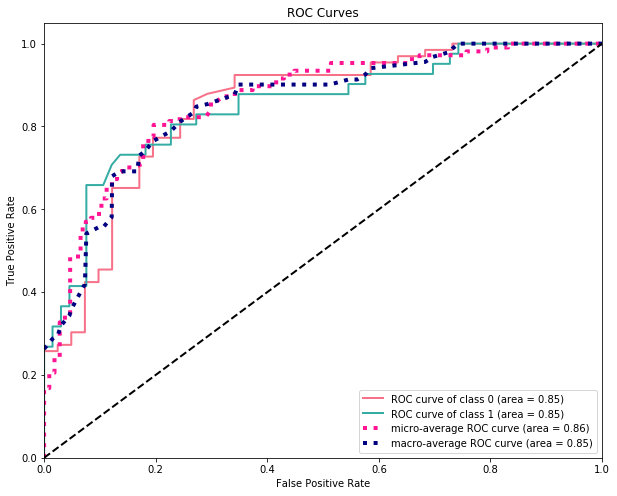

In [65]:
skplt.metrics.plot_roc(y_test,probabilities_test,figsize=(10,8),cmap=cmap)
plt.show()

In a general case we want to minimise the false positive rate, as we do we not want to tell anyone that a particular job has a high salary when in fact it is classified as a low salary. It would also be ideal to have a high true postive rate because , if it actually is a high salary, we would want to mention that to them. Therefore the optimal point (in a general case) would be there the curve would be at a gradient of about 1, which looks like the False Positive rate is at around 0.2

However, in specific cases, the ideal false positive rate and true positive rate may be different. In the situation where we would prefer to tell someone that it is a low salary and infact it is a high salary class, we would want the tradeoff of an increase in true positive rate would be vastly greater than the increase in false postive rate.

Looking at this graph, it seems that there is a large spike at around a FPR of 1.5

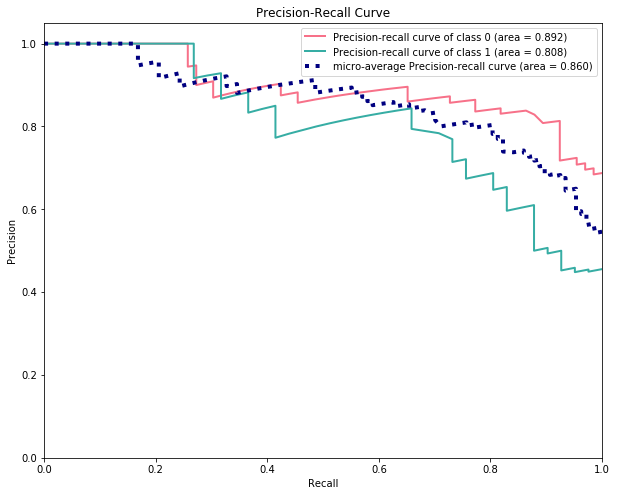

In [66]:
skplt.metrics.plot_precision_recall(y_test,probabilities_test,figsize=(10,8),cmap=cmap)
plt.show()

As previously mentioned, our ideal situation is to have a low recall as well as a high precision for the Low salary. And by looking at the Precision recall curve, it may suggested that we should have a recall value of approximately 0.3 where the tradeoffs are marginal.